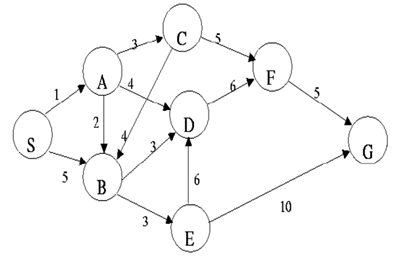

In the above graph, the start state is **S**, and the goal state is **G**. The transition costs are next to the edges, and the heuristic estimate, h, of the distance from the state to the goal is in the state’s node.
<br>
Call **UCS**, **GBF** and  **A star** for this graph. Also insert the drawing of simulations one by one.

In [ ]:
example1 = {'S':{'A':1,'B':5},
            'A':{'B':2,'C':3,'D':4},
            'B':{'D':3,'E':3},
            'C':{'B':4,'F':5},
            'D':{'F':6},
            'E':{'D':6,'G':10},
            'F':{'G':5},
            'G':{}
            }

# Uniform Cost Search

In [ ]:
from queue import PriorityQueue

def ucs(start, goal, G):
    expanded = [] # to store expanded nodes

    pq = PriorityQueue()
    pq.put((0, [start]))

    i = 1
    while not pq.empty():
        ucost, upath = pq.get() # select a node for expansion
        u = upath[-1]

        if u in expanded:# if a u is already expanded, no need to expand again
          continue
        print()

        if u == goal:# goal test
            print(f"{upath} selected and *** GOAL TEST SATISFIED ***")
            print()
            return upath,ucost # path

        expanded.append(u)
        print(f"{i}. Expanding the path: {upath} with cost {ucost}")
        i = i +1
        for v in G[u].keys():#expanding
            if v not in expanded:
              newPath = upath + [v]
              newCost = ucost + G[u][v]
              pq.put((newCost, newPath))
              print(f"<{v}> generated! Cost added: {G[u][v]}.")
        print('\nList of paths in the Queue:')
        for cost,path in pq.queue:
          print(f"{path}: {cost}, g(n) = {cost}")
    print('Failed')

In [ ]:
ucs('S', 'G', example1)


1. Expanding the path: ['S'] with cost 0
<A> generated! Cost added: 1.
<B> generated! Cost added: 5.

List of paths in the Queue:
['S', 'A']: 1, g(n) = 1
['S', 'B']: 5, g(n) = 5

2. Expanding the path: ['S', 'A'] with cost 1
<B> generated! Cost added: 2.
<C> generated! Cost added: 3.
<D> generated! Cost added: 4.

List of paths in the Queue:
['S', 'A', 'B']: 3, g(n) = 3
['S', 'A', 'D']: 5, g(n) = 5
['S', 'A', 'C']: 4, g(n) = 4
['S', 'B']: 5, g(n) = 5

3. Expanding the path: ['S', 'A', 'B'] with cost 3
<D> generated! Cost added: 3.
<E> generated! Cost added: 3.

List of paths in the Queue:
['S', 'A', 'C']: 4, g(n) = 4
['S', 'A', 'D']: 5, g(n) = 5
['S', 'B']: 5, g(n) = 5
['S', 'A', 'B', 'D']: 6, g(n) = 6
['S', 'A', 'B', 'E']: 6, g(n) = 6

4. Expanding the path: ['S', 'A', 'C'] with cost 4
<F> generated! Cost added: 5.

List of paths in the Queue:
['S', 'A', 'D']: 5, g(n) = 5
['S', 'A', 'B', 'D']: 6, g(n) = 6
['S', 'B']: 5, g(n) = 5
['S', 'A', 'B', 'E']: 6, g(n) = 6
['S', 'A', 'C', 'F']:

(['S', 'A', 'C', 'F', 'G'], 14)

Based on the above UCS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

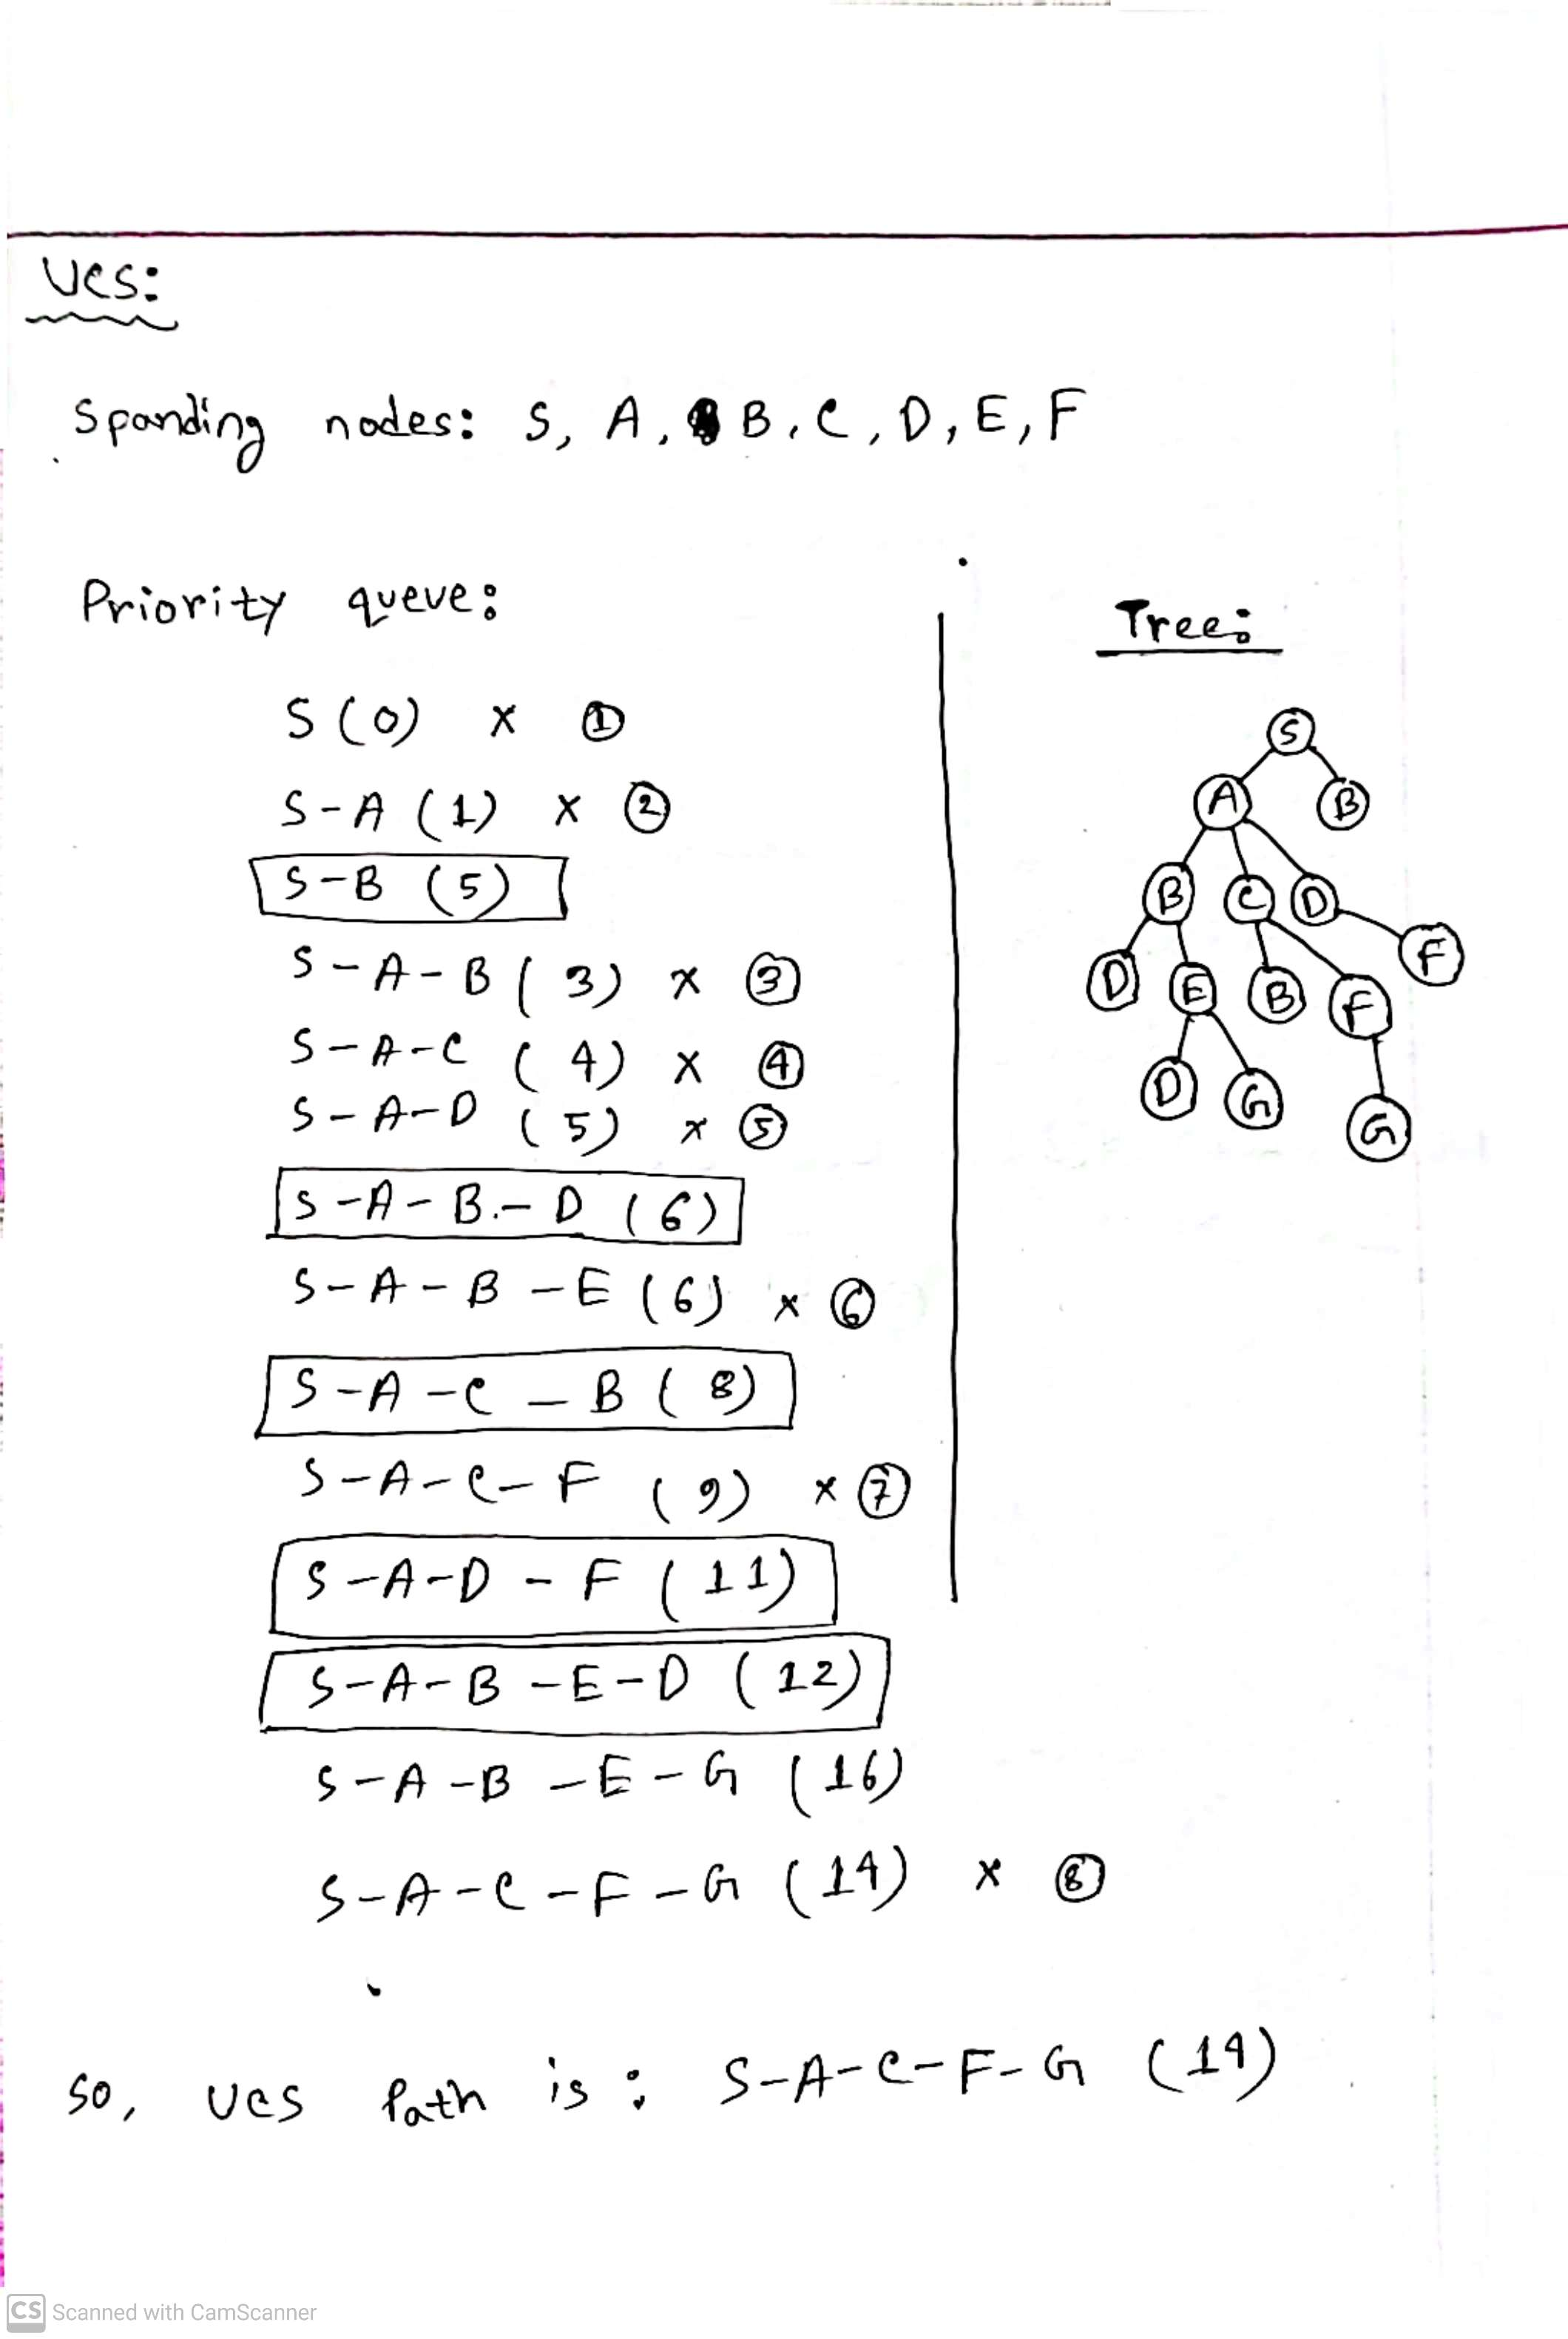

# Greedy Best First Search

In [ ]:
from queue import PriorityQueue

def gbfs(start, goal, G, h):
    expanded = [] # to store expanded nodes

    pq = PriorityQueue()
    pq.put((h[start], [start],0))

    i = 1
    while not pq.empty():
        _,upath, ucost = pq.get() # select a node for expansion
        u = upath[-1]

        if u in expanded:# if a u is already expanded, no need to expand again
          continue
        print()

        if u == goal:# goal test
            print(f"{upath} selected and *** GOAL TEST SATISFIED ***")
            print()
            return upath,ucost # path

        expanded.append(u)
        print(f"{i}. Expanding the path: {upath}")
        i = i +1
        for v in G[u].keys():#expanding
            if v not in expanded:
              newPath = upath + [v]
              newCost = ucost + G[u][v]
              pq.put((h[v], newPath, newCost))
              print(f"<{v}> generated! Cost added: {G[u][v]}.")
        print('\nList of paths in the Queue:')
        for hv,path,cost in pq.queue:
          print(f"{path}: {cost}, h({path[-1]}) = {hv}")
    print('Failed')

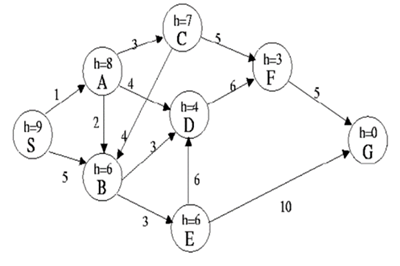

In [ ]:
example1_h = {'S':9,'A':8,'B':6,'C':7,'D':4,'E':6,'F':3,'G':0}
gbfs('S', 'G', example1, example1_h)


1. Expanding the path: ['S']
<A> generated! Cost added: 1.
<B> generated! Cost added: 5.

List of paths in the Queue:
['S', 'B']: 5, h(B) = 6
['S', 'A']: 1, h(A) = 8

2. Expanding the path: ['S', 'B']
<D> generated! Cost added: 3.
<E> generated! Cost added: 3.

List of paths in the Queue:
['S', 'B', 'D']: 8, h(D) = 4
['S', 'A']: 1, h(A) = 8
['S', 'B', 'E']: 8, h(E) = 6

3. Expanding the path: ['S', 'B', 'D']
<F> generated! Cost added: 6.

List of paths in the Queue:
['S', 'B', 'D', 'F']: 14, h(F) = 3
['S', 'A']: 1, h(A) = 8
['S', 'B', 'E']: 8, h(E) = 6

4. Expanding the path: ['S', 'B', 'D', 'F']
<G> generated! Cost added: 5.

List of paths in the Queue:
['S', 'B', 'D', 'F', 'G']: 19, h(G) = 0
['S', 'A']: 1, h(A) = 8
['S', 'B', 'E']: 8, h(E) = 6

['S', 'B', 'D', 'F', 'G'] selected and *** GOAL TEST SATISFIED ***



(['S', 'B', 'D', 'F', 'G'], 19)

Based on the above GBFS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

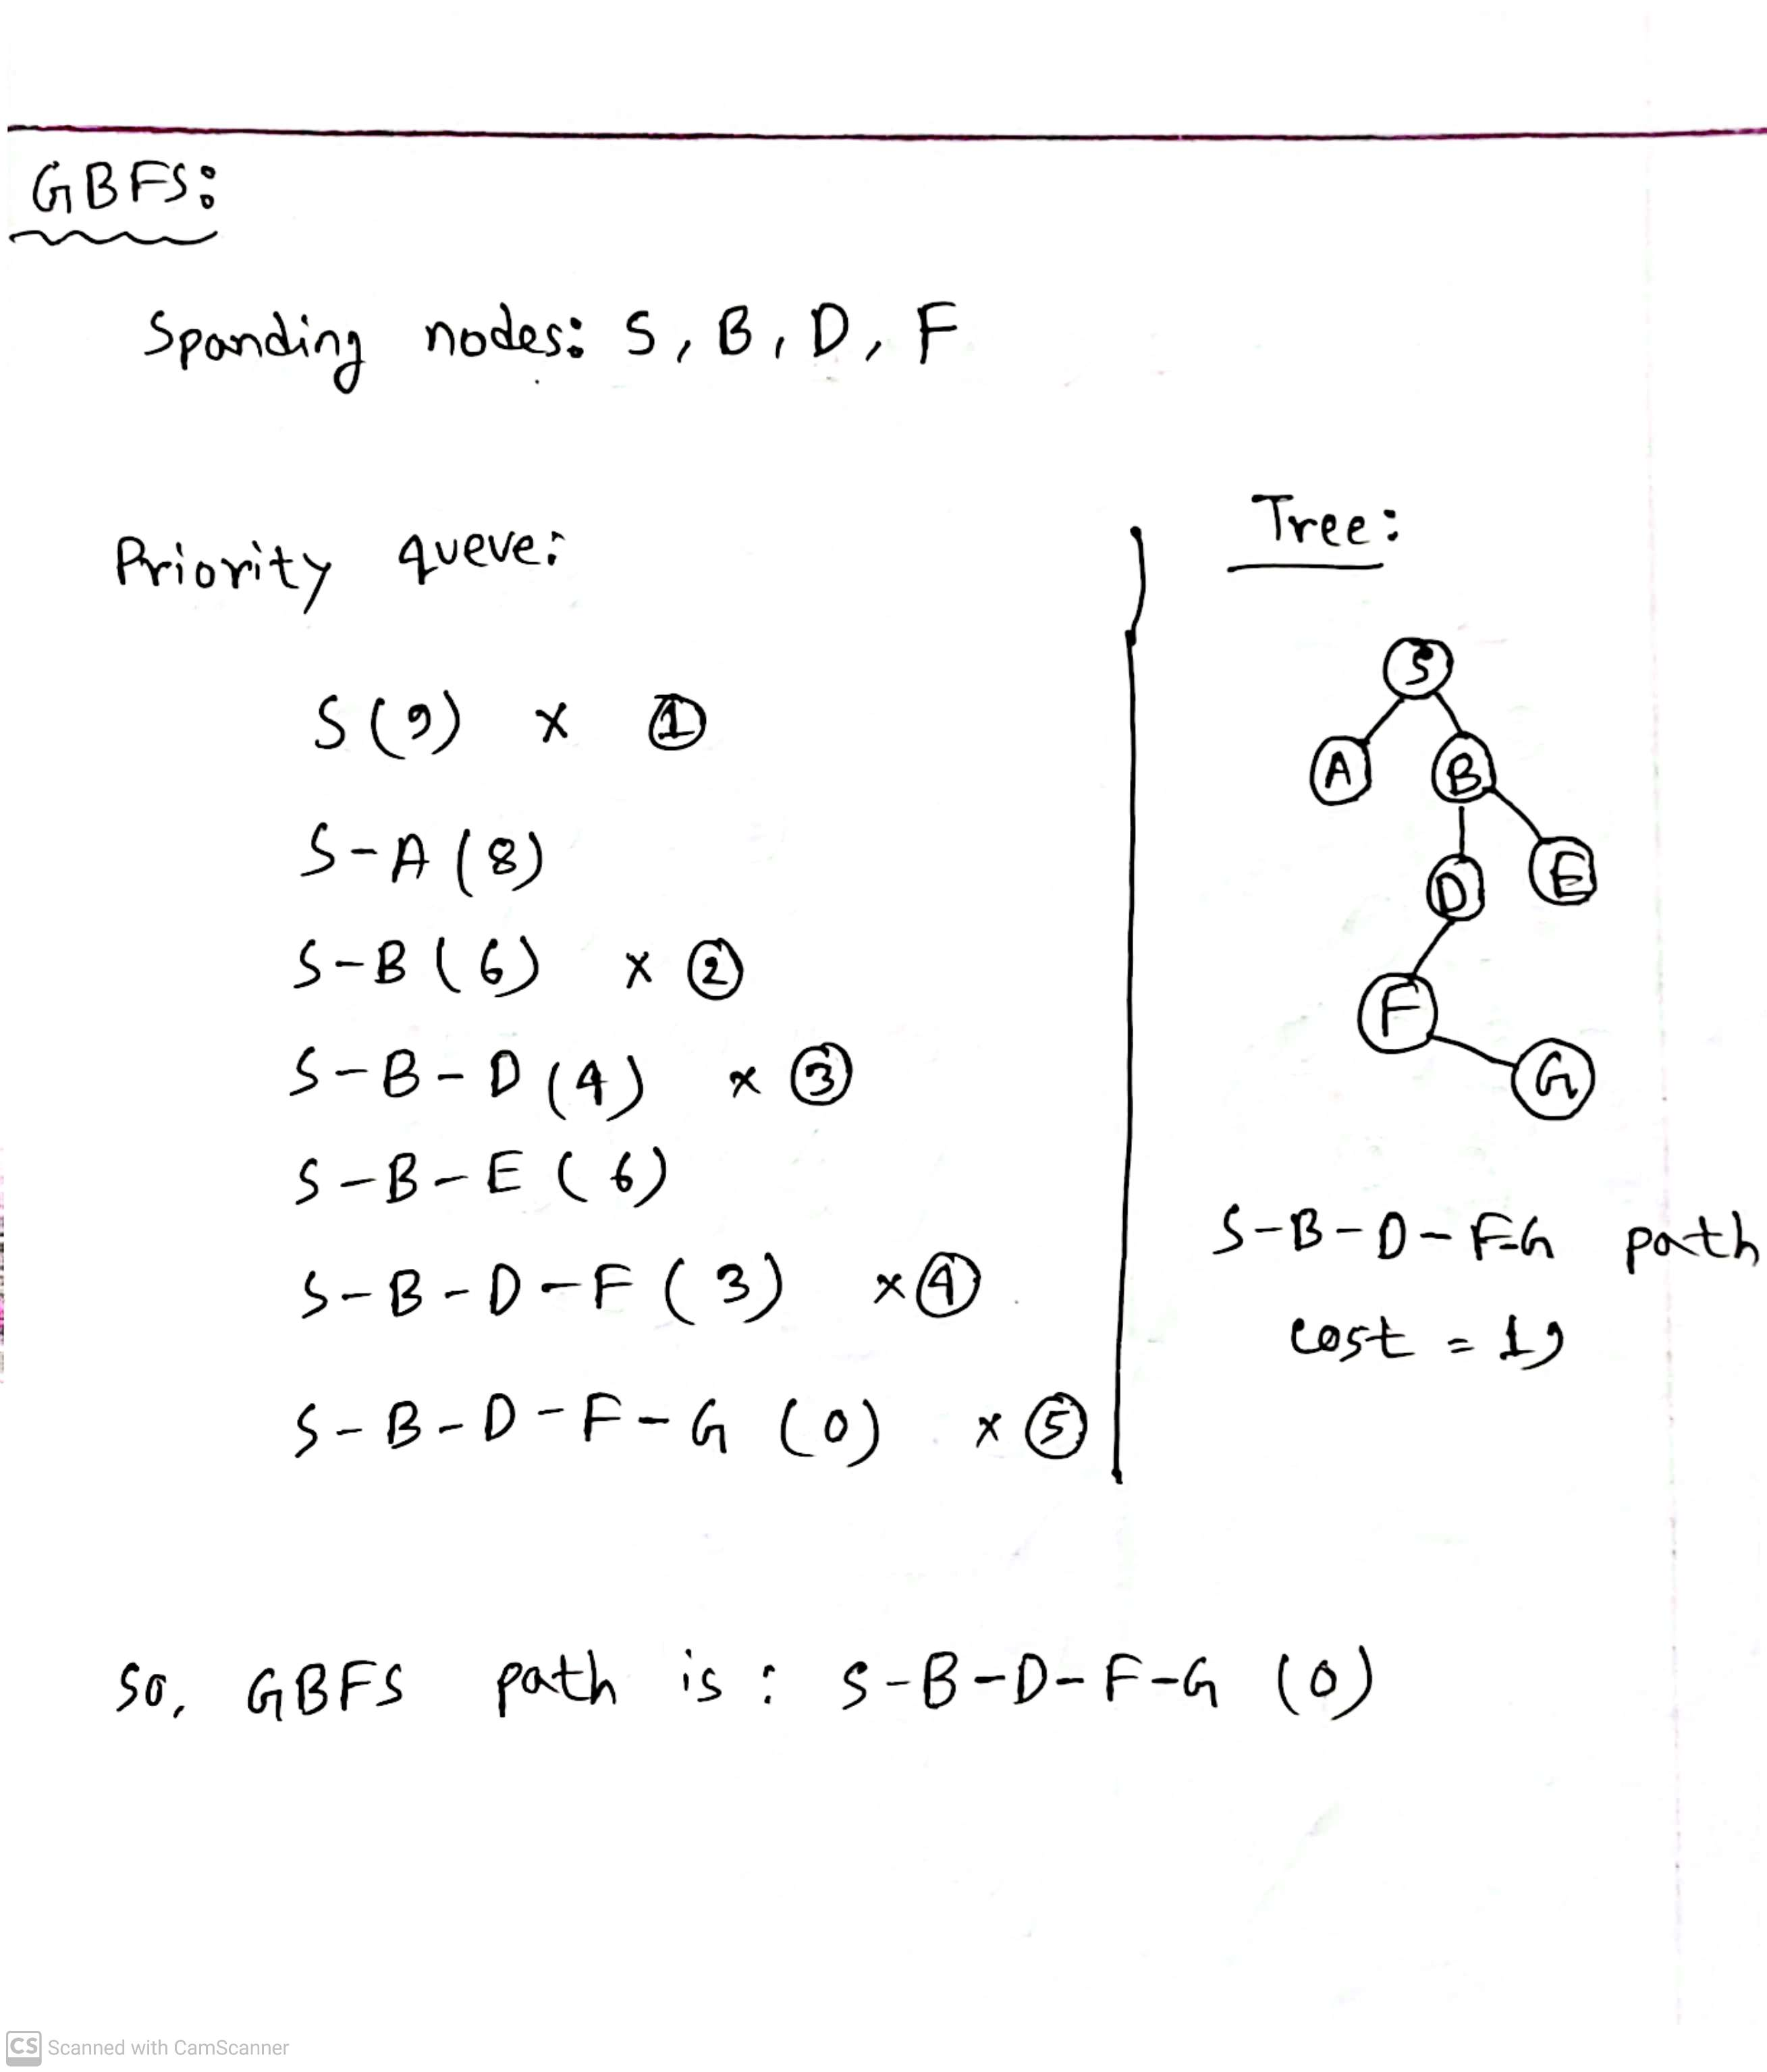

# A*

In [ ]:
from queue import PriorityQueue

def astar(start, goal, G, h):
    expanded = []  # To store expanded nodes

    pq = PriorityQueue()
    pq.put((h[start], [start], 0))  # (f(n), path, g(n))

    i = 1
    while not pq.empty():
        fcost, upath, ucost = pq.get()  # Select a node for expansion
        u = upath[-1]

        if u in expanded:  # If a node is already expanded, skip it
            continue
        print()

        if u == goal:  # Goal test
            print(f"{upath} selected and *** GOAL TEST SATISFIED ***")
            print()
            return upath, ucost  # Return the path and total cost

        expanded.append(u)
        print(f"{i}. Expanding the path: {upath} with cost g(n)={ucost} and f(n)={fcost}")
        i += 1

        for v in G[u].keys():  # Expanding
            if v not in expanded:
                newPath = upath + [v]
                newCost = ucost + G[u][v]  # g(n)
                fcost = newCost + h[v]  # f(n) = g(n) + h(n)
                pq.put((fcost, newPath, newCost))
                print(f"<{v}> generated! Cost added: {G[u][v]}. h({v})={h[v]}, f(n)={fcost}")

        print('\nList of paths in the Queue:')
        for f, path, g in pq.queue:
            print(f"{path}: g(n)={g}, h({path[-1]})={h[path[-1]]}, f(n)={f}")
    print('Failed')


In [ ]:
example1_h = {'S': 9, 'A': 8, 'B': 6, 'C': 7, 'D': 4, 'E': 6, 'F': 3, 'G': 0}
astar('S', 'G', example1, example1_h)


1. Expanding the path: ['S'] with cost g(n)=0 and f(n)=9
<A> generated! Cost added: 1. h(A)=8, f(n)=9
<B> generated! Cost added: 5. h(B)=6, f(n)=11

List of paths in the Queue:
['S', 'A']: g(n)=1, h(A)=8, f(n)=9
['S', 'B']: g(n)=5, h(B)=6, f(n)=11

2. Expanding the path: ['S', 'A'] with cost g(n)=1 and f(n)=9
<B> generated! Cost added: 2. h(B)=6, f(n)=9
<C> generated! Cost added: 3. h(C)=7, f(n)=11
<D> generated! Cost added: 4. h(D)=4, f(n)=9

List of paths in the Queue:
['S', 'A', 'B']: g(n)=3, h(B)=6, f(n)=9
['S', 'A', 'D']: g(n)=5, h(D)=4, f(n)=9
['S', 'A', 'C']: g(n)=4, h(C)=7, f(n)=11
['S', 'B']: g(n)=5, h(B)=6, f(n)=11

3. Expanding the path: ['S', 'A', 'B'] with cost g(n)=3 and f(n)=9
<D> generated! Cost added: 3. h(D)=4, f(n)=10
<E> generated! Cost added: 3. h(E)=6, f(n)=12

List of paths in the Queue:
['S', 'A', 'D']: g(n)=5, h(D)=4, f(n)=9
['S', 'A', 'B', 'D']: g(n)=6, h(D)=4, f(n)=10
['S', 'A', 'C']: g(n)=4, h(C)=7, f(n)=11
['S', 'B']: g(n)=5, h(B)=6, f(n)=11
['S', 'A', 'B'

(['S', 'A', 'C', 'F', 'G'], 14)

Based on the above A* simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

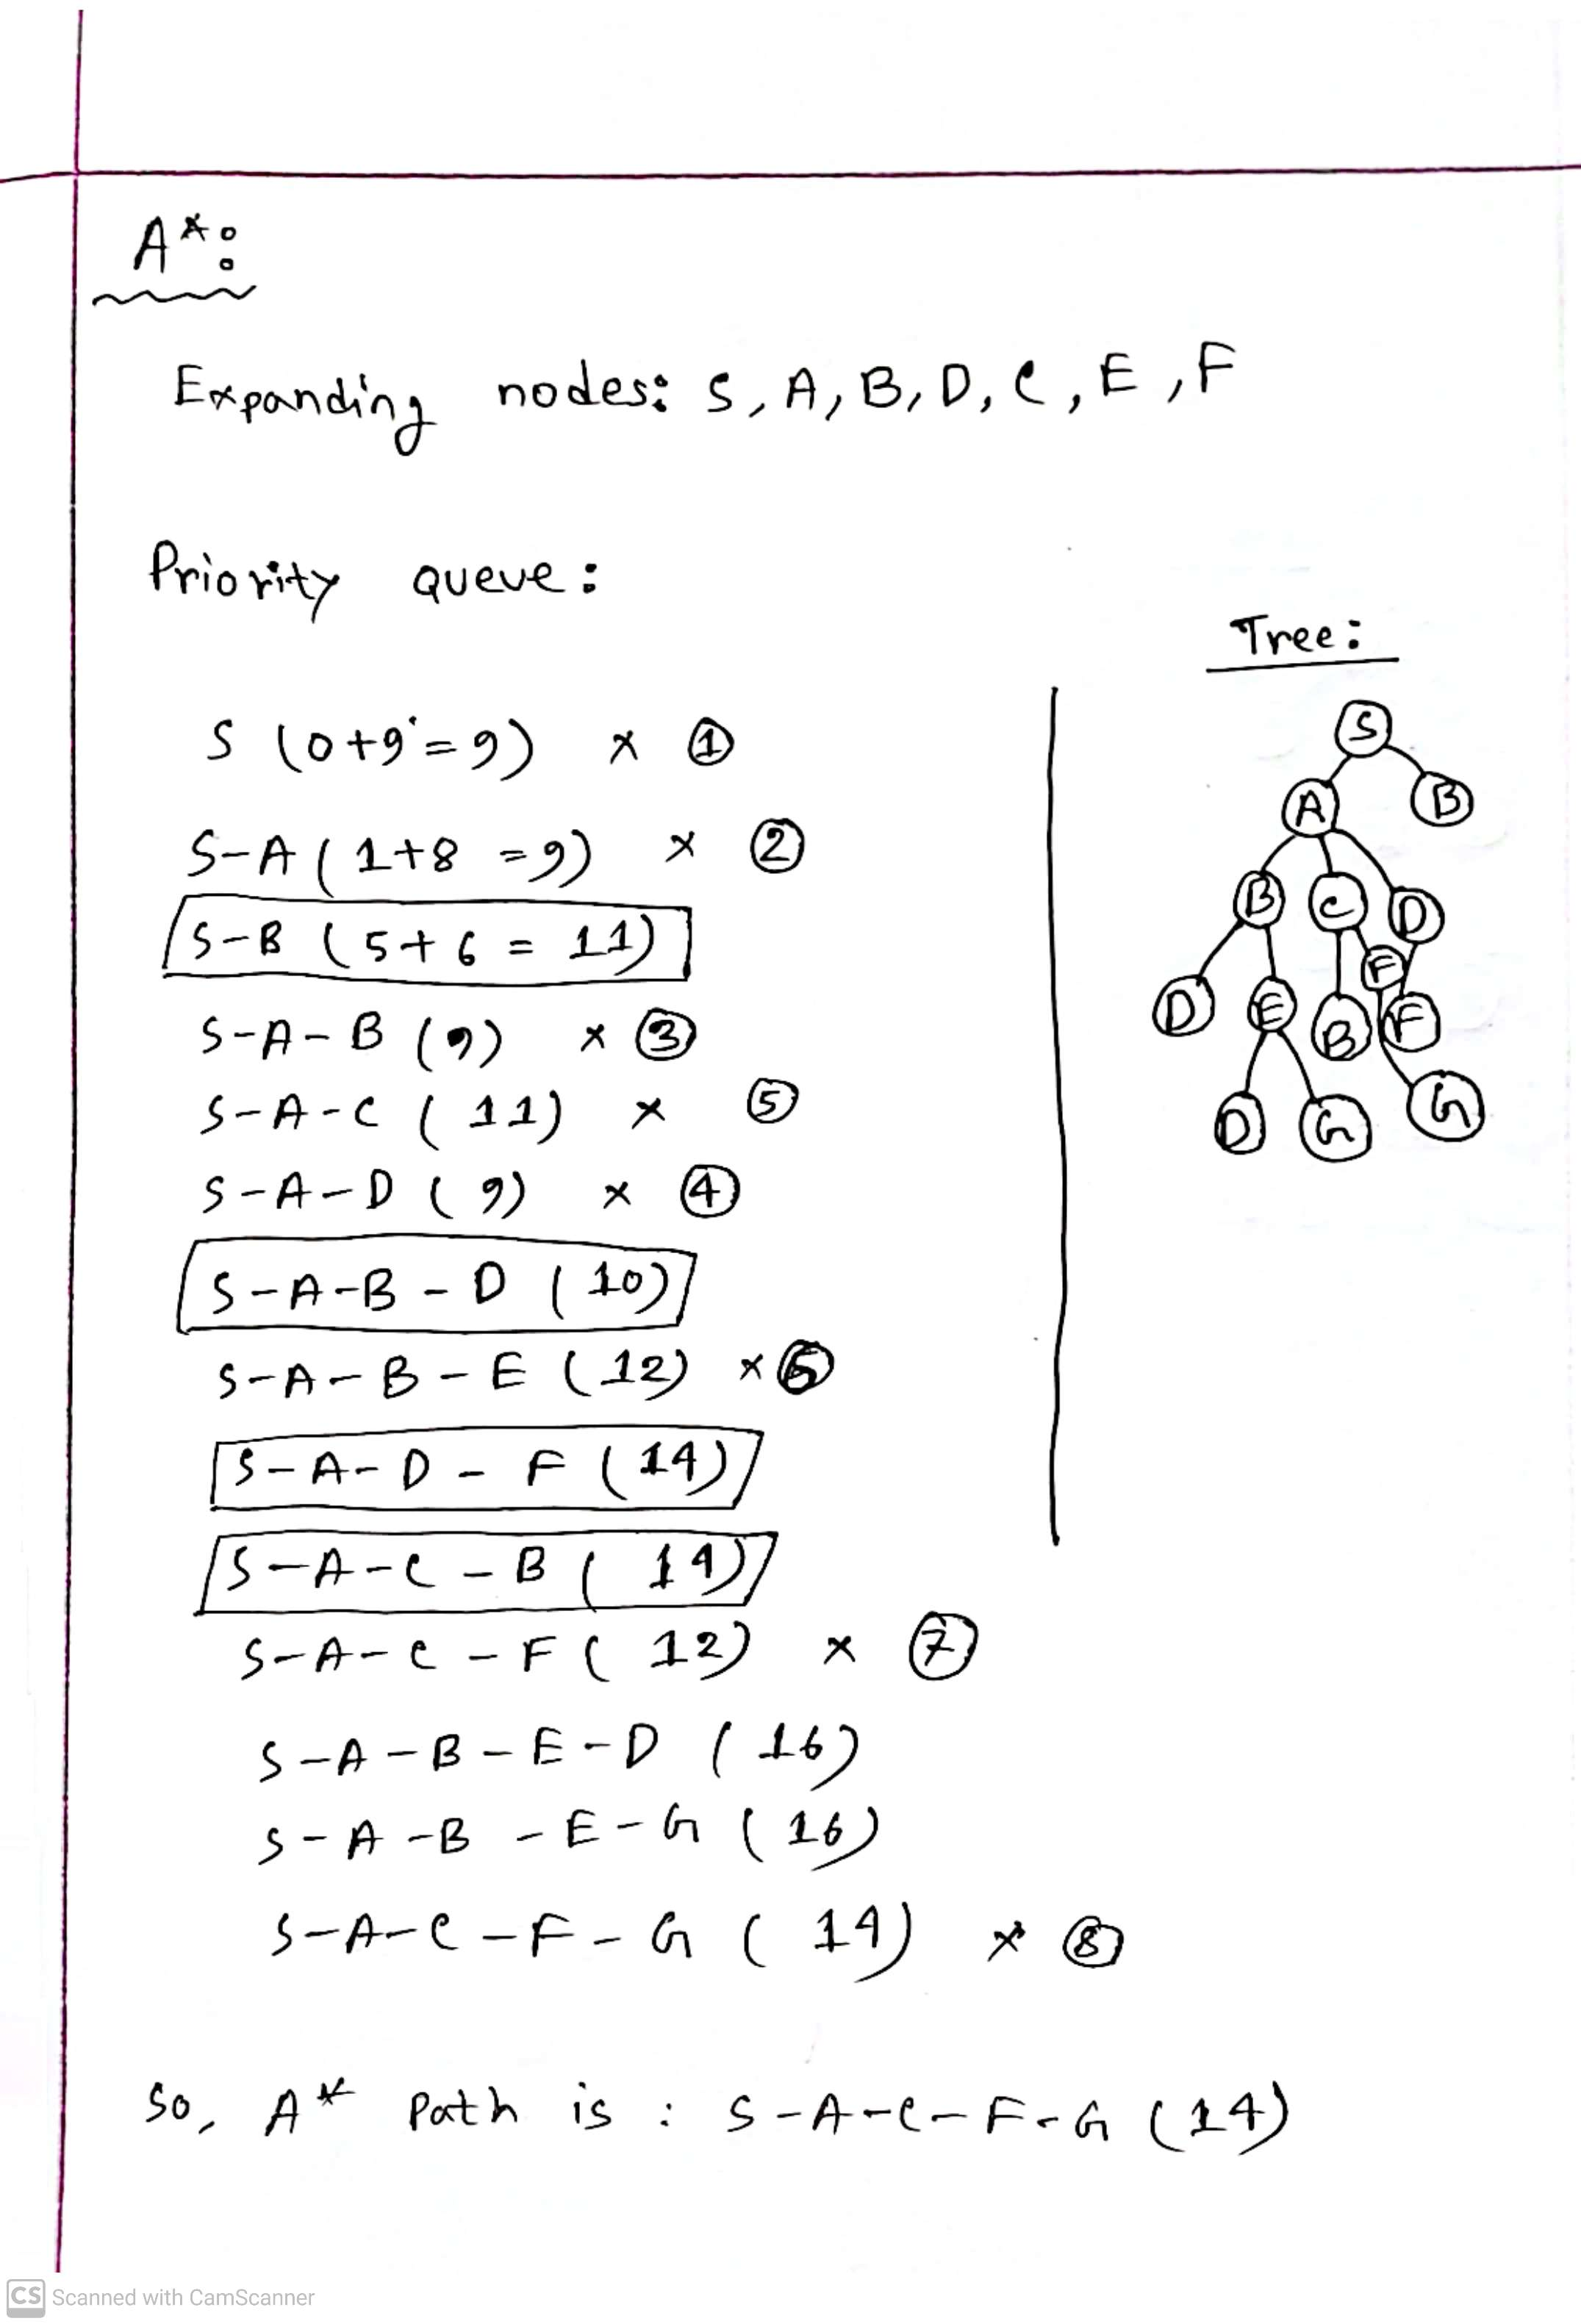

# Another Example

**Arad --> Bucharest**

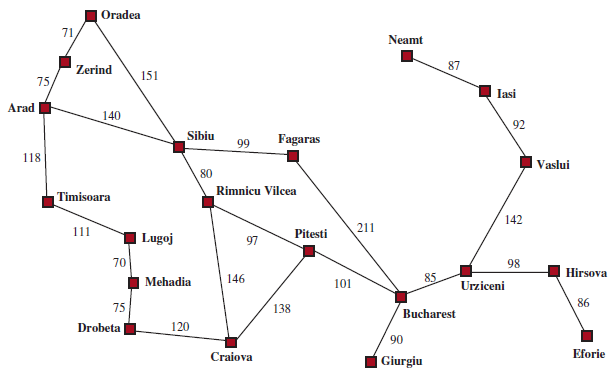

In [ ]:
romanian_map = {
    'Arad': { 'Zerind':75, 'Timisoara':118, 'Sibiu':140},
    'Zerind': {'Arad':75, 'Oradea':71},
    'Oradea': {'Zerind':71, 'Sibiu': 151},
    'Sibiu': {'Arad':140, 'Oradea':151, 'Fagaras':99, 'Rimnicu':80},
    'Timisoara': {'Arad': 118, 'Lugoj':111},
    'Lugoj': {'Timisoara':111, 'Mehadia':70},
    'Mehadia': {'Lugoj': 70, 'Drobeta':75},
    'Drobeta': {'Mehadia':75, 'Craiova':120},
    'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
    'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu':99, 'Bucharest':211},
    'Pitesti': {'Rimnicu': 97, 'Craiova':138, 'Bucharest':101},
    'Bucharest': {'Fagaras':211, 'Pitesti': 101, 'Giurgiu':90, 'Urziceni':85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Vaslui':142, 'Hirsova':98},
    'Hirsova': {'Urziceni':98, 'Eforie':86},
    'Eforie': {'Hirsova':86},
    'Vaslui': {'Iasi': 92, 'Urziceni':142},
    'Iasi': {'Vaslui':92, 'Neamt': 87},
    'Neamt': {'Iasi':87}
}

In [ ]:
h_rm = {'Arad': 366, 'Zerind': 374, 'Oradea': 380, 'Sibiu': 253,
    'Timisoara': 329, 'Lugoj': 244, 'Mehadia': 241,
    'Drobeta': 242, 'Craiova': 160, 'Rimnicu': 193,
    'Fagaras': 176, 'Pitesti': 100, 'Bucharest': 0,
    'Giurgiu': 77, 'Urziceni': 80, 'Hirsova': 151,
    'Eforie': 161, 'Vaslui': 199, 'Iasi': 226, 'Neamt': 234}

In [ ]:
# Call UCS for the Romanian map graph
ucs('Arad', 'Bucharest', romanian_map)


1. Expanding the path: ['Arad'] with cost 0
<Zerind> generated! Cost added: 75.
<Timisoara> generated! Cost added: 118.
<Sibiu> generated! Cost added: 140.

List of paths in the Queue:
['Arad', 'Zerind']: 75, g(n) = 75
['Arad', 'Timisoara']: 118, g(n) = 118
['Arad', 'Sibiu']: 140, g(n) = 140

2. Expanding the path: ['Arad', 'Zerind'] with cost 75
<Oradea> generated! Cost added: 71.

List of paths in the Queue:
['Arad', 'Timisoara']: 118, g(n) = 118
['Arad', 'Sibiu']: 140, g(n) = 140
['Arad', 'Zerind', 'Oradea']: 146, g(n) = 146

3. Expanding the path: ['Arad', 'Timisoara'] with cost 118
<Lugoj> generated! Cost added: 111.

List of paths in the Queue:
['Arad', 'Sibiu']: 140, g(n) = 140
['Arad', 'Zerind', 'Oradea']: 146, g(n) = 146
['Arad', 'Timisoara', 'Lugoj']: 229, g(n) = 229

4. Expanding the path: ['Arad', 'Sibiu'] with cost 140
<Oradea> generated! Cost added: 151.
<Fagaras> generated! Cost added: 99.
<Rimnicu> generated! Cost added: 80.

List of paths in the Queue:
['Arad', 'Zerin

(['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest'], 418)

Based on the above UCS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

In [ ]:
# Call GBFS for the Romanian map graph
gbfs('Arad', 'Bucharest', romanian_map, h_rm)


1. Expanding the path: ['Arad']
<Zerind> generated! Cost added: 75.
<Timisoara> generated! Cost added: 118.
<Sibiu> generated! Cost added: 140.

List of paths in the Queue:
['Arad', 'Sibiu']: 140, h(Sibiu) = 253
['Arad', 'Zerind']: 75, h(Zerind) = 374
['Arad', 'Timisoara']: 118, h(Timisoara) = 329

2. Expanding the path: ['Arad', 'Sibiu']
<Oradea> generated! Cost added: 151.
<Fagaras> generated! Cost added: 99.
<Rimnicu> generated! Cost added: 80.

List of paths in the Queue:
['Arad', 'Sibiu', 'Fagaras']: 239, h(Fagaras) = 176
['Arad', 'Sibiu', 'Rimnicu']: 220, h(Rimnicu) = 193
['Arad', 'Sibiu', 'Oradea']: 291, h(Oradea) = 380
['Arad', 'Zerind']: 75, h(Zerind) = 374
['Arad', 'Timisoara']: 118, h(Timisoara) = 329

3. Expanding the path: ['Arad', 'Sibiu', 'Fagaras']
<Bucharest> generated! Cost added: 211.

List of paths in the Queue:
['Arad', 'Sibiu', 'Fagaras', 'Bucharest']: 450, h(Bucharest) = 0
['Arad', 'Sibiu', 'Rimnicu']: 220, h(Rimnicu) = 193
['Arad', 'Sibiu', 'Oradea']: 291, h(Or

(['Arad', 'Sibiu', 'Fagaras', 'Bucharest'], 450)

Based on the above GBFS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

In [ ]:
# Call A* for the Romanian map graph
astar('Arad', 'Bucharest', romanian_map, h_rm)


1. Expanding the path: ['Arad'] with cost g(n)=0 and f(n)=366
<Zerind> generated! Cost added: 75. h(Zerind)=374, f(n)=449
<Timisoara> generated! Cost added: 118. h(Timisoara)=329, f(n)=447
<Sibiu> generated! Cost added: 140. h(Sibiu)=253, f(n)=393

List of paths in the Queue:
['Arad', 'Sibiu']: g(n)=140, h(Sibiu)=253, f(n)=393
['Arad', 'Zerind']: g(n)=75, h(Zerind)=374, f(n)=449
['Arad', 'Timisoara']: g(n)=118, h(Timisoara)=329, f(n)=447

2. Expanding the path: ['Arad', 'Sibiu'] with cost g(n)=140 and f(n)=393
<Oradea> generated! Cost added: 151. h(Oradea)=380, f(n)=671
<Fagaras> generated! Cost added: 99. h(Fagaras)=176, f(n)=415
<Rimnicu> generated! Cost added: 80. h(Rimnicu)=193, f(n)=413

List of paths in the Queue:
['Arad', 'Sibiu', 'Rimnicu']: g(n)=220, h(Rimnicu)=193, f(n)=413
['Arad', 'Sibiu', 'Fagaras']: g(n)=239, h(Fagaras)=176, f(n)=415
['Arad', 'Sibiu', 'Oradea']: g(n)=291, h(Oradea)=380, f(n)=671
['Arad', 'Zerind']: g(n)=75, h(Zerind)=374, f(n)=449
['Arad', 'Timisoara']: 

(['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest'], 418)

Based on the above A* simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

# New Exercise